# Testing the Linear Model trained in TensorFlow 

In [1]:
from __future__ import print_function
from link_bot_notebooks import toy_problem_optimization_common as tpo
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from link_bot_notebooks.linear_tf_model import LinearTFModel

In [2]:
goal = np.array([[0, 0, 0, 0, 0, 0]])
args = {'checkpoint': "log_data/new_init_M3/February_07_14:13:53__96b4f633b3/nn.ckpt-10000", 'log': False, 'debug': False}
dataset = "../../../link_bot_teleop/data/10_50_random_test.npy"
DT = 0.1
data = np.load(dataset)

In [3]:
model = LinearTFModel(args, 1, N=6, M=3, L=2, n_steps=50, dt=DT)
model.load()

INFO:tensorflow:Restoring parameters from log_data/new_init_M3/February_07_14:13:53__96b4f633b3/nn.ckpt-10000
Restored ckpt log_data/new_init_M3/February_07_14:13:53__96b4f633b3/nn.ckpt-10000 at step 10000


In [4]:
# A, B, C, D, sp_loss, cp_loss, reg, loss = model.evaluate(data, goal, display=True)

## Plotting

In [5]:
s, u, c = model.compute_cost_label(data, goal)

In [30]:
s0 = np.expand_dims(s[0], 0)
u0 = np.expand_dims(u[0], 0)
c0 = np.expand_dims(c[0], 0)
loss, true_o, hat_o_next, hat_c = model.sess.run([model.loss, model.hat_o, model.hat_o_next, model.hat_c], feed_dict={model.s: s0, model.u: u0, model.g: goal, model.c: c0})
print(loss)

0.56736714


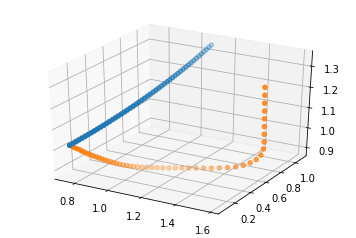

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hat_o_next[0, :, 0], hat_o_next[0, :, 1], hat_o_next[0, :, 2], label='predicted')
ax.scatter(true_o[0, :, 0], true_o[0, :, 1], true_o[0, :, 2], label='true')

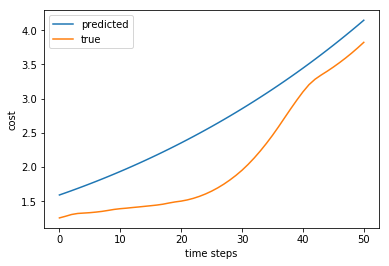

In [29]:
plt.figure()
plt.plot(hat_c[0, :], label='predicted')
plt.plot(c0[0,:], label='true')
plt.xlabel("time steps")
plt.ylabel("cost")
plt.legend()